In [1]:
import pandas as pd
import spacy
import numpy as np
import nltk

from gensim.models import word2vec
import re

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.manifold import TSNE

In [26]:
# Declare functions
STOP_WORDS = nltk.corpus.stopwords.words()

def clean_sentence(string):
    
    # Cleaning the urls
    string = re.sub(r'https?://\S+|www\.\S+', '', string)

    # Cleaning the html elements
    string = re.sub(r'<.*?>', '', string)
    
    # Cleaning the non-ascii characters
    string = re.sub(r'[^\x00-\x7F]+', '', string)
    
    # Cleaning the non alphabetical characters
    string = ' '.join([word for word in string.split() if word.isalpha()])

    # Cleaning punctuations
    string = re.sub(r'[^\w\s]','', string)

    # Converting the text to lower
    string = string.lower()

    # Removing stop words
    string = ' '.join([word for word in string.split() if word not in STOP_WORDS])
    
    # Cleaning the whitespaces
    string = re.sub(r'\s+', ' ', string).strip()

    return string 

def clean_dataframe(data):
    
    # Drop rows that are empty
    data = data.dropna(how="any")
    
    # Apply Clean_Sentence function to entire dataframe row
    data['body'] = data['body'].apply(clean_sentence)
    
    return data

def build_corpus(df_name,data):
    
    corpus = []
    
    # Iterate items and add it to the corpus array
    for sentence in df_name["" + data + ""].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
            
    return corpus

def tsne_plot(model):
    # Creates TSNE model and plots it
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [27]:
df_comments = pd.read_csv("kaggle_RC_2019-05.csv")
df_comments = clean_dataframe(df_comments)
df_comments

,subreddit,body,controversiality,score
0,gameofthrones,submission automatically removed post titles m...,0,1
1,aww,dont squeeze massive mean,0,19
2,gaming,pretty well known paid product hamilton advert...,0,3
3,news,know laws currently willfully ignorant gun laws,0,10
4,politics,difference gentle suppression hard neither good,0,1
5,dankmemes,please let become dark pheniox memes,0,2
6,relationship_advice,would less worried fucked past worried still g...,0,7
7,nba,water,0,9
8,worldnews,many millions suffer feel pain,0,3
9,aww,amazing,0,3


In [ ]:
fig, ax = plt.subplots(figsize=(6,10), dpi=120)
df_comments.groupby('subreddit')['subreddit'].count().plot(kind='barh', ax=ax)
ax.set_xlabel('Count');

In [28]:
for category in tqdm(df_comments.subreddit.unique()):
    df_comments[(''+ category + '')] =  df_comments[df_comments['subreddit'].str.contains(category)]['body']

df_comments = df_comments.drop('subreddit', 1)
df_comments = df_comments.drop('body', 1)
df_comments = df_comments.drop('controversiality', 1)
df_comments = df_comments.drop('score', 1)

df = df_comments.apply(lambda x: pd.Series(x.dropna().values))
df = df.dropna()
df

100%|██████████| 40/40 [00:44<00:00,  1.11s/it]


,gameofthrones,aww,gaming,news,politics,dankmemes,relationship_advice,nba,worldnews,AskReddit,...,Animemes,FortNiteBR,nfl,trashy,unpopularopinion,ChapoTrapHouse,RoastMe,Showerthoughts,wallstreetbets,Pikabu
0,submission automatically removed post titles m...,dont squeeze massive mean,pretty well known paid product hamilton advert...,know laws currently willfully ignorant gun laws,difference gentle suppression hard neither good,please let become dark pheniox memes,would less worried fucked past worried still g...,water,many millions suffer feel pain,like giant turd feels like coming sideways,...,especially fucked,skins time,id say hes underrated wouldnt say hes id say h...,aww fell,actually probably look anything like would abl...,overcharge swanky bistros avocado toast,look like cws flash iron deficiency,pretty big clit,gay proud think lets make great,
1,nice zap,amazing,would,many millions suffer feel pain,got filed jointly income teacher,dont,would actually like say possibilities play lau...,jackson popcorn,administration lying fox believe,rather mike pence million times,...,dead,get wanna know,steelers chargers success late really defense ...,bet jackass know unless driver license technic...,dont like fucked fully awake nobodys really di...,every took sure missed,know nebula aspiring musician,extremely even little collection dude would fa...,shit funny hell,
2,people keep comparing different preferred deep...,best find orange dream,cant handle turn idea counter gatekeep said di...,really happens often ridiculous pretend applies,think tell people longer right express,,find relevant happens topic happens,reason anyone knows jared dudley simmons said ...,industry china still deeply entwined notion ch...,invest lot,...,set clad baby zombie fire lil boi proceeded de...,epic stated introduction siphon lowered qualit...,would fact possession marijuana change,least get heinz ketchup,consider someone favor better human experience...,need preserve western culture,nice swap phone case,yeah point,lol greeting get whenever uber drivers pick,
3,written directed,boss provided condition exchange letting mess ...,freaking learn actions,disgusting every week,lots people without jobs,wait wut,bother giving power make walk away never look ...,youd say year old buddy hield isnt part kings ...,meanwhile ontario government cancelled funding...,joseph joestar ohmahgod horyshieet could demon...,...,well though wasnt gonna get announced get chap...,least,always looking practice champions trestman,,looks like someone morning tendies ftfy,juan guaido shouldnt leader venezuela eat muduros,nice douchebag haircut scrappy blond mil debt ...,dino game needs certain amount boredom despera...,plenty gains go people actually like making,
4,watch would realistically look,definitely alcohol lucking unit lad like stones,game fuel fucking new dope ass lid slidy pop t...,administration lying fox believe,boys wanna shovel,dank dank post breaks,relationship wholly probably sign two meant co...,oh know going comment lol,speak people talk like,grandma saying like kindergarten shed like col...,...,taco bell,mobile player tell isnt true,friend plays softball washburn knows fairly in...,somewhere definitely something could see happe...,mean native americans continuously slaughtered...,well thought sure colorado springs would guess,look like nice guy bright need get help talk,knuckles,bot linking direct images albums,
5,saw revived plan dany wouldnt gotten dragon ch...,ur gentlman downvoted,movie looks see guys opening,industry china still deeply entwined notion ch...,everything power make sure biden get nominatio...,,first would someone considering second lol don...,gotta double new lines work think,considering private ownership firearms tried b...,findings,...,love kazuma thinks life great literally died s...,happy birthday season,thank sincerely appreciate,religion runs,job fun pays decent chose video game average y...,really got going learn trump beating bernie go...,m

In [29]:
model_arr = []
for category in df:
    corpus = build_corpus(df, category)
    model = word2vec.Word2Vec(corpus, size=100, window=20, workers=4)
    model_arr.append(model)

C:\Users\GinoDC\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


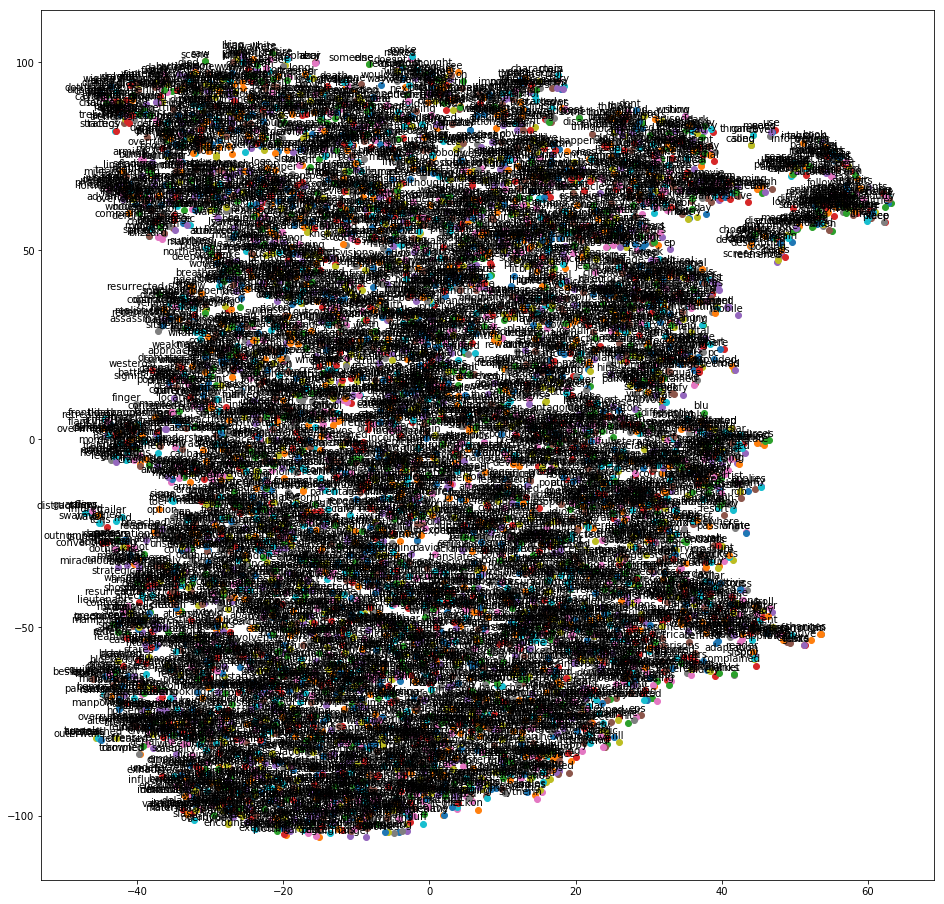

In [24]:
for i, category in enumerate(df):
    print("CATEGORY: ", category)
    tqdm(tsne_plot(model_arr[i]))


C:\Users\GinoDC\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


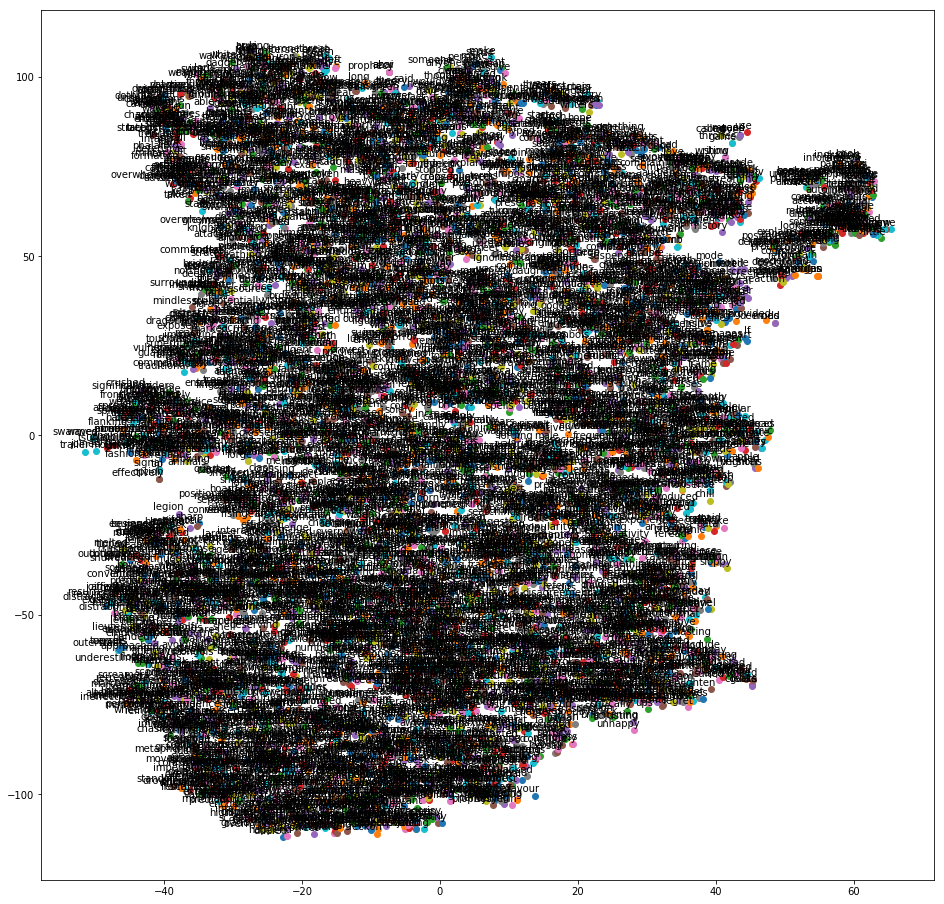

In [41]:
tsne_plot(model_arr[0])

In [39]:
arr = []
print("WORD BEING SEARCHED: LOL\n")
for i, category in enumerate(df):
    try:
        print("CATEGORY: ", category)
        arr.append(model_arr[i].wv.most_similar("lol"))
        for j in enumerate(arr[i]):
            print(j)
        print("\n")
    except KeyError:
        print("No lol found in model")

WORD BEING SEARCHED: LOL

CATEGORY:  gameofthrones
(0, ('complained', 0.9854368567466736))
(1, ('discuss', 0.9784380197525024))
(2, ('substance', 0.9775007963180542))
(3, ('critiques', 0.9668573141098022))
(4, ('basement', 0.9651765823364258))
(5, ('sorry', 0.9624073505401611))
(6, ('relax', 0.9618980884552002))
(7, ('cinema', 0.9617208242416382))
(8, ('change', 0.9615492820739746))
(9, ('talking', 0.9610196948051453))


CATEGORY:  aww
(0, ('bit', 0.9997995495796204))
(1, ('two', 0.9995450973510742))
(2, ('almost', 0.9995197057723999))
(3, ('didnt', 0.9995149374008179))
(4, ('exactly', 0.9992322325706482))
(5, ('girl', 0.9992287158966064))
(6, ('walks', 0.9991544485092163))
(7, ('miss', 0.999148964881897))
(8, ('guy', 0.999142050743103))
(9, ('went', 0.9990718364715576))


CATEGORY:  gaming
(0, ('love', 0.9991948008537292))
(1, ('mcc', 0.9989708065986633))
(2, ('fps', 0.998681902885437))
(3, ('witcher', 0.9986008405685425))
(4, ('havent', 0.998572826385498))
(5, ('hour', 0.998538017272